In [1]:
# set up jupyter
from IPython.display import display, Markdown # pretty display
from IPython.core.interactiveshell import InteractiveShell # multi output

InteractiveShell.ast_node_interactivity = 'all' # type: ignore

In [2]:
# import libraries
import pandas as pd
from joblib import load
from random import randrange
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from utils import Preprocessor

In [3]:
from model_generator.utils.plotter import Plotter

In [4]:
# preprocess
data = (
    Preprocessor()
    .load_data("./dataset/demo.csv")
    .load_scaler("./utils/scaler.joblib")
    .process()
)
display(data.nunique())

Avg Packet Size           11270
Avg Bwd Segment Size       8655
Bwd Packet Length Max      1945
Bwd Packet Length Mean     8655
Bwd Packet Length Min       343
Bwd Packet Length Std      9650
Down/Up Ratio                 8
Packet Length Max          2352
Packet Length Std         13502
Packet Length Variance    13502
Class                         2
dtype: int64

In [5]:
# prep demo
target = data["Class"]
features = data.drop("Class", axis=1)
get_rand_row = lambda: randrange(0, len(data.index))

In [6]:
feature_columns = features.columns

In [11]:
decision_tree: DecisionTreeClassifier = load("./models/decision_tree.joblib")
Markdown("# Decision Tree")

# Decision Tree

[[ 97185    533]
 [103895  24132]]
Accuracy:  0.5374072515448847
Precision:  0.9783904317859314
Recall:  0.18849149007631202


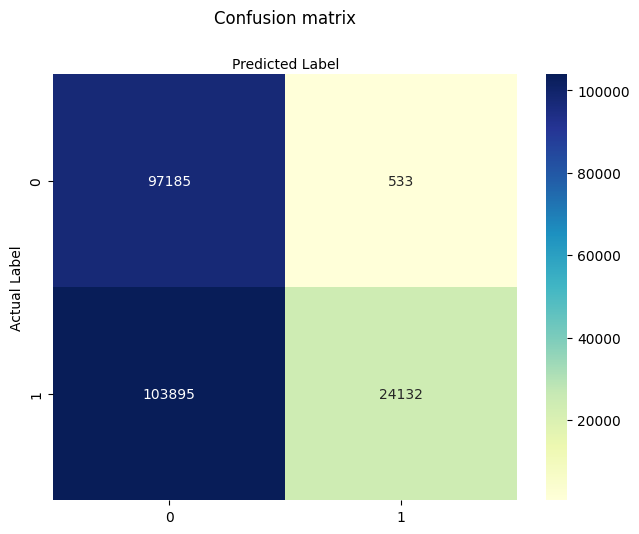

In [12]:
pred = decision_tree.predict(features.values)
plotter = Plotter(target)
plotter(pred)

In [9]:
# run this node to test a random sample from the demo dataset
row = get_rand_row()
val = [features.iloc[row]]
display(val)
[prediction] = decision_tree.predict(val)
Markdown(f"Actual: {target[row]} Prediction: {prediction}")

[Avg Packet Size           7.0
 Avg Bwd Segment Size      6.0
 Bwd Packet Length Max     6.0
 Bwd Packet Length Mean    6.0
 Bwd Packet Length Min     6.0
 Bwd Packet Length Std     0.0
 Down/Up Ratio             5.0
 Packet Length Max         6.0
 Packet Length Std         0.0
 Packet Length Variance    0.0
 Name: 155951, dtype: float64]

Actual: 0 Prediction: 0